<a href="https://colab.research.google.com/github/Hamzarafique100/Machine-Learning-portfolio-projects/blob/master/TF2_0_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)


11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [ ]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2996 - accuracy: 0.9134 - val_loss: 0.1442 - val_accuracy: 0.9571
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1457 - accuracy: 0.9570 - val_loss: 0.1085 - val_accuracy: 0.9666
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1092 - accuracy: 0.9668 - val_loss: 0.0902 - val_accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0901 - accuracy: 0.9732 - val_loss: 0.0822 - val_accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0764 - accuracy: 0.9761 - val_loss: 0.0774 - val_accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0669 - accuracy: 0.9785 - val_loss: 0.0801 - val_accuracy: 0.9759
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0608 - accuracy: 0.9807 - val_loss: 0.0782 - val_accuracy:

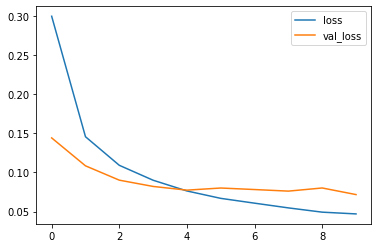

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

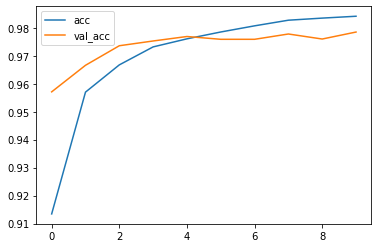

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0718 - accuracy: 0.9785
[0.07175582647323608, 0.9785000085830688]


Confusion matrix, without normalization
[[ 970    0    0    1    1    2    2    1    3    0]
 [   0 1122    1    4    0    1    1    0    6    0]
 [   4    1 1017    1    1    0    1    4    3    0]
 [   0    0    8  984    0    7    0    3    2    6]
 [   1    0    3    0  966    0    5    1    2    4]
 [   2    0    0    7    2  875    2    0    3    1]
 [   3    3    1    1    4    3  939    0    4    0]
 [   0    2   14    4    2    0    0  997    2    7]
 [   3    0    5    6    5    4    0    2  945    4]
 [   2    3    0    5   16    4    0    5    4  970]]


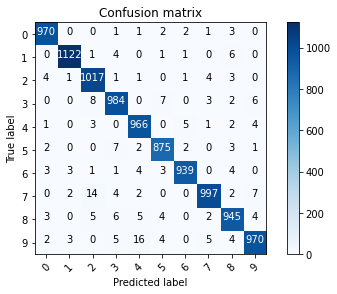

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

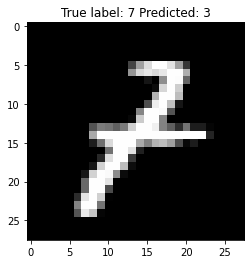

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));